# Time Step Restriction

In [1]:
import numpy as np
from scipy.special import erf
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

<>:26: SyntaxWarning: invalid escape sequence '\D'
<>:27: SyntaxWarning: invalid escape sequence '\D'
<>:26: SyntaxWarning: invalid escape sequence '\D'
<>:27: SyntaxWarning: invalid escape sequence '\D'
/var/folders/9h/nmgxk6252393vjm65h0cjxxr0000gn/T/ipykernel_73032/87194232.py:26: SyntaxWarning: invalid escape sequence '\D'
  plt.title("Maximum $\Delta t$ for each $\epsilon$", fontsize=24)
/var/folders/9h/nmgxk6252393vjm65h0cjxxr0000gn/T/ipykernel_73032/87194232.py:27: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('Max $\Delta t$', fontsize=20)


Text(0.5, 0, '$\\epsilon$')

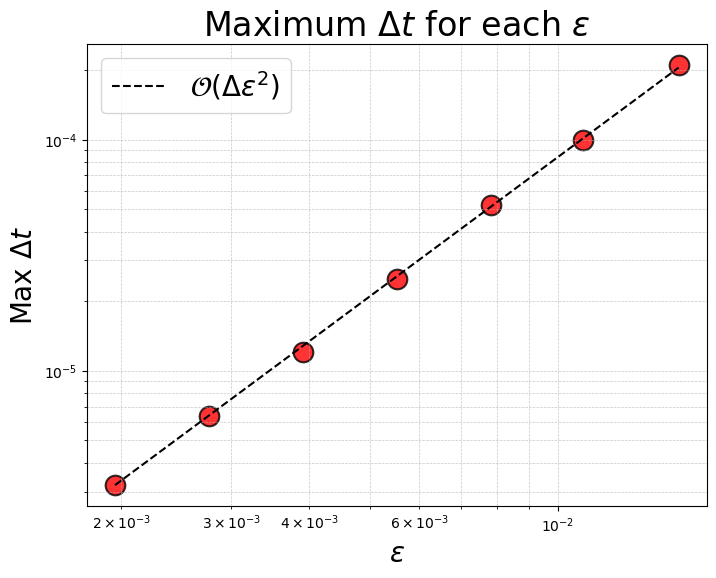

In [3]:
maxdt = np.array([3.2e-6, 6.4e-6, 1.2e-5, 2.5e-5, 5.2e-5, 1e-4, 2.1e-4])
eps = np.array([(1/512), (1/362), (1/256), (1/181), (1/128), (1/91), (1/64)])

plt.figure(figsize=(8, 6))
plt.scatter(eps, maxdt, s=200, color='red', edgecolors='black', linewidth=1.5, alpha=0.8)

plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# ---- Add Reference Error Lines ----
C1 = maxdt[0] / eps[0]  # Scaling factor for ∼ ε
C2 = maxdt[0] / (eps[0]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 *eps    # ∼ ε reference line
eps_2 = C2 *eps**2  # ∼ ε² reference line

# Plot reference lines
#plt.loglog(eps, eps_1, 'k--', label=r'$\sim \Delta x$')   # First-order convergence
plt.loglog(eps, eps_2, 'k--', label=r'$\mathcal{O}(\Delta \epsilon^2)$') # Second-order convergence



plt.legend(fontsize=20)


plt.title("Maximum $\Delta t$ for each $\epsilon$", fontsize=24)
plt.ylabel('Max $\Delta t$', fontsize=20)
plt.xlabel(r'$\epsilon$', fontsize = 20)


#plt.savefig("Stability_epsilon.png", format="png")

# Stability Condition for epsilon (Accurate)

<>:27: SyntaxWarning: invalid escape sequence '\D'
<>:28: SyntaxWarning: invalid escape sequence '\D'
<>:27: SyntaxWarning: invalid escape sequence '\D'
<>:28: SyntaxWarning: invalid escape sequence '\D'
/var/folders/9h/nmgxk6252393vjm65h0cjxxr0000gn/T/ipykernel_73032/553440590.py:27: SyntaxWarning: invalid escape sequence '\D'
  plt.title("Stability Limit: Maximum $\Delta t$ for each $\epsilon^{*}$", fontsize=16)
/var/folders/9h/nmgxk6252393vjm65h0cjxxr0000gn/T/ipykernel_73032/553440590.py:28: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('Max $\Delta t$', fontsize=13)


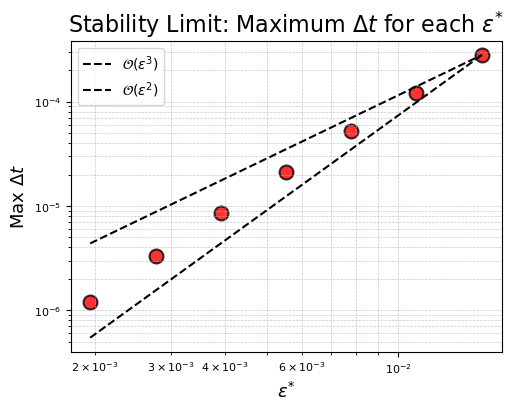

In [6]:
maxdt = np.array([1.2e-6, 3.3e-6, 8.5e-6, 2.1e-5, 5.2e-5, 1.2e-4, 2.8e-4])
#maxdt = 6*maxdt
eps = np.array([(1/512), (1/362), (1/256), (1/181), (1/128), (1/91), (1/64)])

plt.figure(figsize=(5, 4), layout='constrained')
plt.scatter(eps, maxdt, s=100, color='red', edgecolors='black', linewidth=1.5, alpha=0.8)

plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# ---- Add Reference Error Lines ----
C1 = maxdt[-1] / (eps[-1]**3)  # Scaling factor for ∼ ε
C2 = maxdt[-1] / (eps[-1]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 *eps**3    # ∼ ε reference line
eps_2 = C2 *eps**2  # ∼ ε² reference line

# Plot reference lines
plt.loglog(eps, eps_1, 'k--', label=r'$\mathcal{O}(\epsilon^3)$')   # First-order convergence
plt.loglog(eps, eps_2, 'k--', label=r'$\mathcal{O}(\epsilon^2)$') # Second-order convergence



plt.legend(fontsize=10)


plt.title("Stability Limit: Maximum $\Delta t$ for each $\epsilon^{*}$", fontsize=16)
plt.ylabel('Max $\Delta t$', fontsize=13)
plt.xlabel(r'$\epsilon^{*}$', fontsize = 13)

plt.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='both', which='minor', labelsize=8)

#plt.savefig("Stability_eps.pdf", format="pdf")

# Stability Restriction Crank-Nicolson vs Explicit Euler

<>:32: SyntaxWarning: invalid escape sequence '\D'
<>:32: SyntaxWarning: invalid escape sequence '\D'
/var/folders/9h/nmgxk6252393vjm65h0cjxxr0000gn/T/ipykernel_73032/1281414768.py:32: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('Max $\Delta t$', fontsize=13)


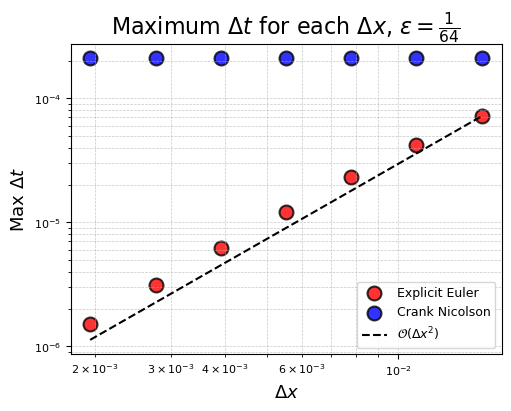

In [9]:
plt.figure(figsize=(5, 4), layout='constrained')

maxdt_Euler = np.array([1.5e-6, 3.1e-6, 6.2e-6, 1.2e-5, 2.3e-5, 4.2e-5, 7.2e-5])
dx = np.array([(1/512), (1/362), (1/256), (1/181), (1/128), (1/91), (1/64)])

maxdt_Crank = np.array([2.1e-4, 2.1e-4, 2.1e-4, 2.1e-4, 2.1e-4, 2.1e-4, 2.1e-4])

plt.scatter(dx, maxdt_Euler, s=100, color='red', edgecolors='black', linewidth=1.5, alpha=0.8, label = 'Explicit Euler')

plt.scatter(dx, maxdt_Crank, s=100, color='blue', edgecolors='black', linewidth=1.5, alpha=0.8, label = 'Crank Nicolson')

plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# ---- Add Reference Error Lines ----
C1 = maxdt_Euler[0] / dx[0]  # Scaling factor for ∼ ε
C2 = maxdt_Euler[-1] / (dx[-1]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 *dx    # ∼ ε reference line
eps_2 = C2 *dx**2  # ∼ ε² reference line

# Plot reference lines
#plt.loglog(eps, eps_1, 'k--', label=r'$\sim \Delta x$')   # First-order convergence
plt.loglog(dx, eps_2, 'k--', label=r'$\mathcal{O}(\Delta x^2)$') # Second-order convergence



plt.legend(fontsize=9)


plt.title(r"Maximum $\Delta t$ for each $\Delta x$, $\epsilon = \frac{1}{64}$", fontsize=16)
plt.ylabel('Max $\Delta t$', fontsize=13)
plt.xlabel(r'$\Delta x$', fontsize = 13)

plt.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='both', which='minor', labelsize=8)

#plt.savefig("iStability_Euler_vs_Crank.png", format="png")
#plt.savefig("iStability_Euler_vs_Crank.pdf", format="pdf")

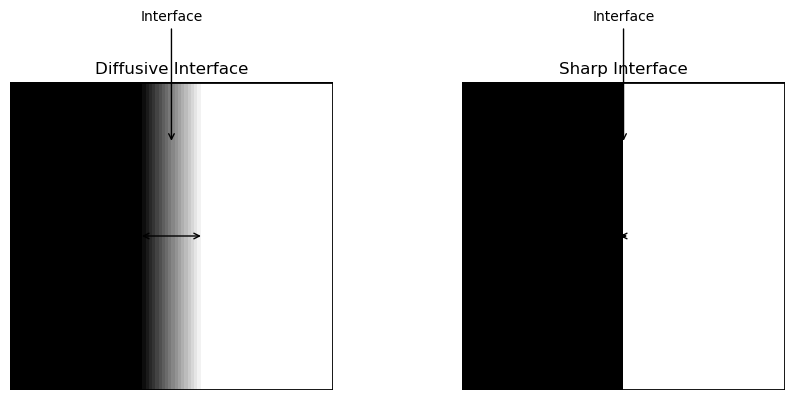

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Create custom colormaps for the diffusive and sharp interfaces
diffusive_cmap = LinearSegmentedColormap.from_list("diffusive", ["black", "white"])
sharp_cmap = LinearSegmentedColormap.from_list("sharp", ["black", "white"])

# --------------------------
# First Figure: Both Interfaces with Arrows and Labels
# --------------------------
fig1, axs1 = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.4)

# Panel a: Diffusive interface
x_diffusive = np.linspace(0, 1, 100)
y_diffusive = np.linspace(0, 1, 10)
X_diff, Y_diff = np.meshgrid(x_diffusive, y_diffusive)

# Create a smaller interface region for diffusive
diffusive_data = X_diff.copy()
diffusive_data[:, :40] = 0  # Black region
diffusive_data[:, 40:60] = np.linspace(0, 1, 20)  # Interface (gradient)
diffusive_data[:, 60:] = 1  # White region

im1 = axs1[0].imshow(diffusive_data, cmap=diffusive_cmap, extent=[0, 1, 0, 0.1], aspect='auto')
axs1[0].set_title("Diffusive Interface")
axs1[0].axis('off')

# Add arrows and label for the interface
axs1[0].annotate('Interface', xy=(0.5, 0.08), xytext=(0.5, 0.12),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center', fontsize=10)
axs1[0].annotate('', xy=(0.4, 0.05), xytext=(0.6, 0.05),
                 arrowprops=dict(facecolor='black', arrowstyle='<->'))

# Add black outline
axs1[0].add_patch(plt.Rectangle((0, 0), 1, 0.1, edgecolor='black', facecolor='none', lw=2))

# Panel b: Sharp interface
x_sharp = np.linspace(0, 1, 100)
y_sharp = np.linspace(0, 1, 10)
X_sharp, Y_sharp = np.meshgrid(x_sharp, y_sharp)

# Create a sharp transition
sharp_data = np.zeros_like(X_sharp)
sharp_data[:, :50] = 0  # Black region
sharp_data[:, 50:] = 1  # White region

im2 = axs1[1].imshow(sharp_data, cmap=sharp_cmap, extent=[0, 1, 0, 0.1], aspect='auto')
axs1[1].set_title("Sharp Interface")
axs1[1].axis('off')

# Add arrows and label for the interface
axs1[1].annotate('Interface', xy=(0.5, 0.08), xytext=(0.5, 0.12),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center', fontsize=10)
axs1[1].annotate('', xy=(0.48, 0.05), xytext=(0.52, 0.05),
                 arrowprops=dict(facecolor='black', arrowstyle='<->'))

# Add black outline
axs1[1].add_patch(plt.Rectangle((0, 0), 1, 0.1, edgecolor='black', facecolor='none', lw=2))

plt.show()

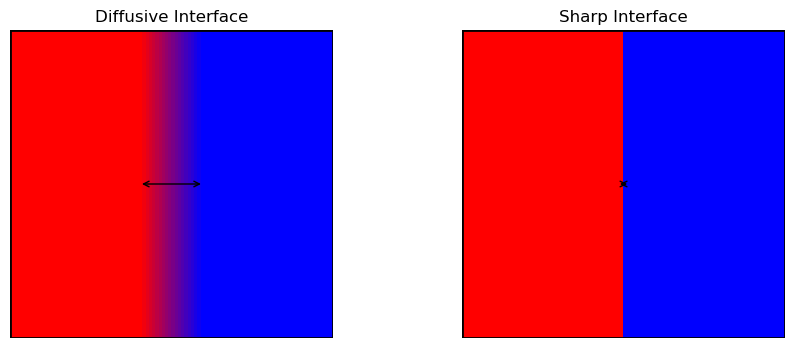

In [12]:
# Create custom colormap from red to blue
red_to_blue_cmap = LinearSegmentedColormap.from_list("red_to_blue", ["red", "blue"])

# --------------------------
# First Figure: Both Interfaces with Red-to-Blue Transition
# --------------------------
fig1, axs1 = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.4)

# Panel a: Diffusive interface
x_diffusive = np.linspace(0, 1, 100)
y_diffusive = np.linspace(0, 1, 10)
X_diff, Y_diff = np.meshgrid(x_diffusive, y_diffusive)

# Create a smaller interface region for diffusive
diffusive_data = X_diff.copy()
diffusive_data[:, :40] = 0  # Red region
diffusive_data[:, 40:60] = np.linspace(0, 1, 20)  # Interface (gradient)
diffusive_data[:, 60:] = 1  # Blue region

im1 = axs1[0].imshow(diffusive_data, cmap=red_to_blue_cmap, extent=[0, 1, 0, 0.1], aspect='auto')
axs1[0].set_title("Diffusive Interface")
axs1[0].axis('off')

#axs1[0].annotate('Interface', xy=(0.5, 0.08), xytext=(0.5, 0.12),
                # arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center', fontsize=10)
axs1[0].annotate('', xy=(0.4, 0.05), xytext=(0.6, 0.05),
                 arrowprops=dict(facecolor='black', arrowstyle='<->'))

# Add black outline
axs1[0].add_patch(plt.Rectangle((0, 0), 1, 0.1, edgecolor='black', facecolor='none', lw=2))

# Panel b: Sharp interface
x_sharp = np.linspace(0, 1, 100)
y_sharp = np.linspace(0, 1, 10)
X_sharp, Y_sharp = np.meshgrid(x_sharp, y_sharp)

# Create a sharp transition
sharp_data = np.zeros_like(X_sharp)
sharp_data[:, :50] = 0  # Red region
sharp_data[:, 50:] = 1  # Blue region

im2 = axs1[1].imshow(sharp_data, cmap=red_to_blue_cmap, extent=[0, 1, 0, 0.1], aspect='auto')
axs1[1].set_title("Sharp Interface")
axs1[1].axis('off')

# Add arrows and label for the interface
#axs1[1].annotate('Interface', xy=(0.5, 0.08), xytext=(0.5, 0.12),
                 #arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center', fontsize=10)
axs1[1].annotate('', xy=(0.48, 0.05), xytext=(0.52, 0.05),
                 arrowprops=dict(facecolor='black', arrowstyle='<->'))

# Add black outline
axs1[1].add_patch(plt.Rectangle((0, 0), 1, 0.1, edgecolor='black', facecolor='none', lw=2))

plt.show()

(-0.1, 1.1)

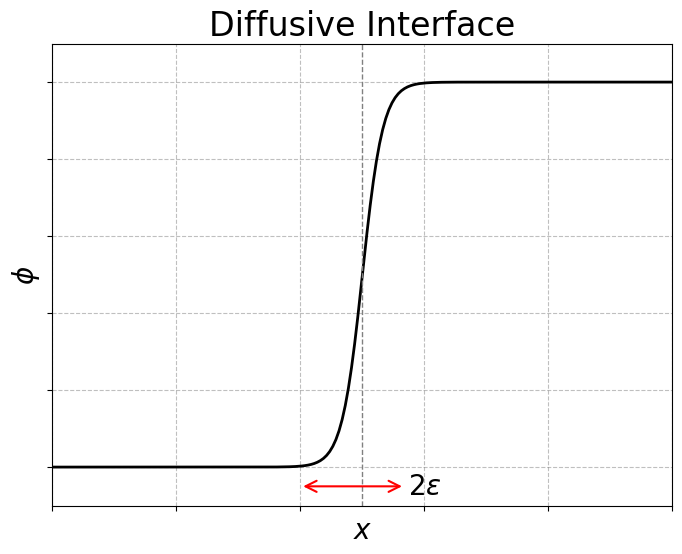

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(8, 6))

# Define data
distance = np.linspace(0, 1, 200)  # More points for smoothness
epsilon = 0.5  # Transition point
sharpness = 30  # Increase for sharper transition
field_variable = 0.5 * (1 + np.tanh((distance - epsilon) * sharpness))  # Sharper transition

# Plot the diffusive interface curve
plt.plot(distance, field_variable, color="black", linewidth=2)

# Vertical dashed line at epsilon
plt.axvline(epsilon, linestyle="--", color="gray", linewidth=1)

# Epsilon marker with a **perfectly horizontal** red double-headed arrow
plt.annotate(r"$2\epsilon$", xy=(epsilon - 0.1, -0.05), xytext=(epsilon + 0.1, -0.05),
             arrowprops=dict(arrowstyle="<->", color='red', linewidth=1.5), fontsize=20, ha='center', va='center')



# Labels and title
plt.title("Diffusive Interface", fontsize=24)
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel(r"$\phi$", fontsize=20)

# Remove tick labels but keep axis lines
plt.grid(True, which="both", linestyle="--", color="gray", alpha=0.5)
#plt.xticks([labelbottom=False, labelleft=False])
#plt.yticks([labelbottom=False, labelleft=False])

plt.tick_params(labelbottom=False, labelleft=False) 


# Adjust axis limits
plt.xlim(0, 1)
plt.ylim(-0.1, 1.1)

# Show figure
#plt.show()
#plt.savefig("diffusive_interface.svg", format="svg", dpi=300)
#plt.savefig("diffusive_interface.pdf", format="pdf")

(-0.1, 1.1)

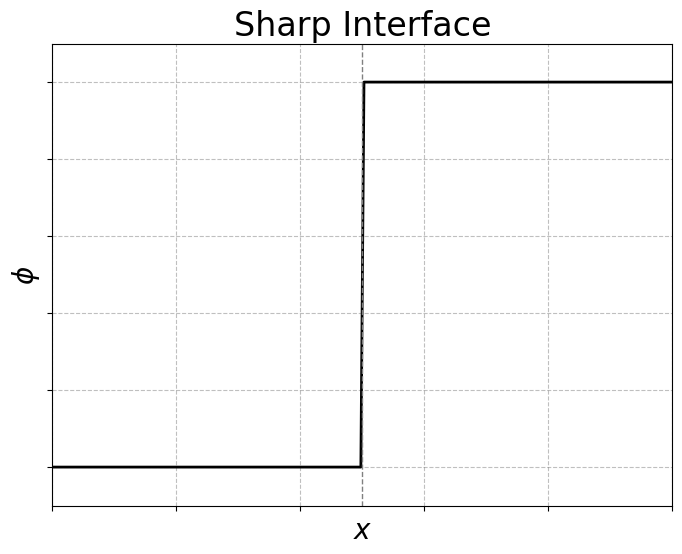

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(8, 6))

# Define data
distance = np.linspace(0, 1, 200)  # More points for smoothness
epsilon = 0.5  # Transition point
sharp_variable = np.zeros_like(distance)
sharp_variable[distance > epsilon] = 1
plt.plot(distance, sharp_variable, color="black", linewidth=2)

# Vertical dashed line at epsilon
plt.axvline(epsilon, linestyle="--", color="gray", linewidth=1)


#plt.annotate(r"$h$", xy=(epsilon, -0.1), xytext=(epsilon, 0),
            #arrowprops=dict(arrowstyle="<->", color='red', linewidth=1.5), fontsize=20, ha='center', va='center')



# Labels and title
plt.title("Sharp Interface", fontsize=24)
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel(r"$\phi$", fontsize=20)

# Remove tick labels but keep axis lines
plt.grid(True, which="both", linestyle="--", color="gray", alpha=0.5)
#plt.xticks([labelbottom=False, labelleft=False])
#plt.yticks([labelbottom=False, labelleft=False])

plt.tick_params(labelbottom=False, labelleft=False) 


# Adjust axis limits
plt.xlim(0, 1)
plt.ylim(-0.1, 1.1)

# Show figure
#plt.show()
#plt.savefig("sharp_interface.svg", format="svg", dpi=300)

#plt.savefig("sharp_interface.pdf", format="pdf")

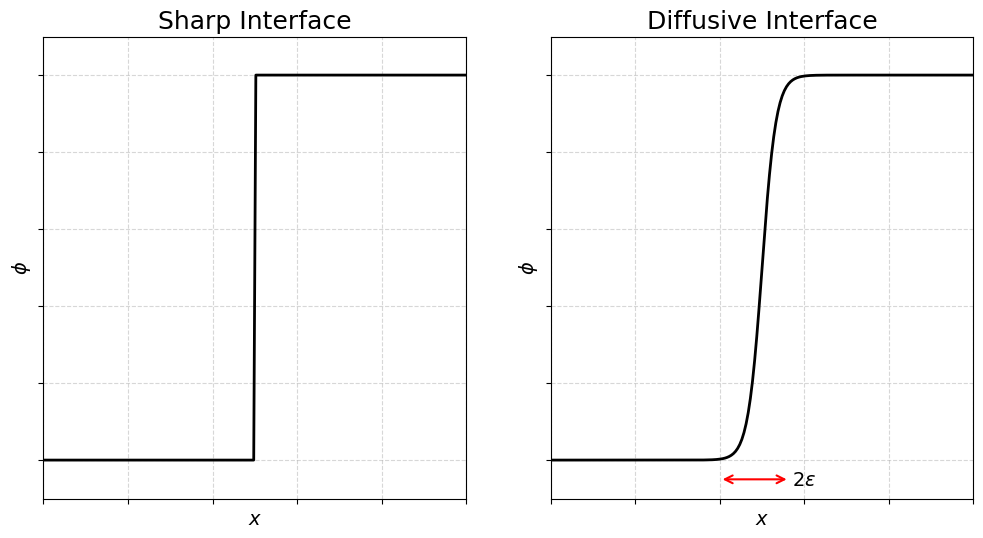

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define data
distance = np.linspace(0, 1, 200)  # More points for smoothness
epsilon = 0.5  # Transition point

# Create figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# ---- First subplot: Diffusive Interface ----
sharpness = 30  # Increase for sharper transition
field_variable = 0.5 * (1 + np.tanh((distance - epsilon) * sharpness))  # Sharper transition
axes[1].plot(distance, field_variable, color="black", linewidth=2)


# Epsilon marker with a horizontal red double-headed arrow
axes[1].annotate(r"$2\epsilon$", xy=(epsilon - 0.1, -0.05), xytext=(epsilon + 0.1, -0.05),
                 arrowprops=dict(arrowstyle="<->", color='red', linewidth=1.5), fontsize=14, ha='center', va='center')

# Labels and title
axes[1].set_title("Diffusive Interface", fontsize=18)
axes[1].set_xlabel(r"$x$", fontsize=14)
axes[1].set_ylabel(r"$\phi$", fontsize=14)
axes[1].grid(True, linestyle="--", alpha=0.5)
axes[1].set_xlim(0, 1)
axes[1].set_ylim(-0.1, 1.1)
axes[1].tick_params(labelbottom=False, labelleft=False)

# ---- Second subplot: Sharp Interface ----
sharp_variable = np.zeros_like(distance)
sharp_variable[distance > epsilon] = 1
axes[0].plot(distance, sharp_variable, color="black", linestyle="-", linewidth=2)


# Labels and title
axes[0].set_title("Sharp Interface", fontsize=18)
axes[0].set_xlabel(r"$x$", fontsize=14)
axes[0].set_ylabel(r"$\phi$", fontsize=14)
axes[0].grid(True, linestyle="--", alpha=0.5)
axes[0].set_xlim(0, 1)
axes[0].set_ylim(-0.1, 1.1)
axes[0].tick_params(labelbottom=False, labelleft=False)

# Adjust layout and show
#plt.savefig("interfaces.png", format="png")


[]

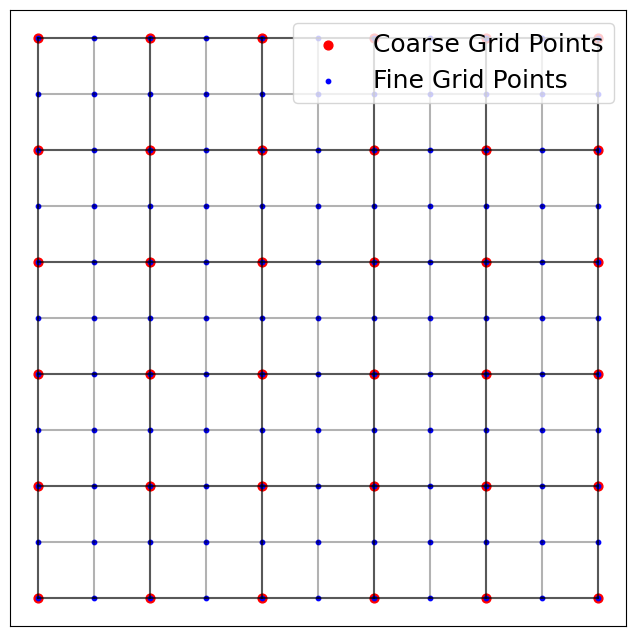

In [20]:
# Define coarse and fine grids
x_coarse = np.linspace(0, 1, 6)  # Coarse grid
x_fine = np.linspace(0, 1, 11)  # Fine grid
y_coarse = np.linspace(0, 1, 6)
y_fine = np.linspace(0, 1, 11)

# Mesh grids
X_coarse, Y_coarse = np.meshgrid(x_coarse, y_coarse)
X_fine, Y_fine = np.meshgrid(x_fine, y_fine)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Coarse grid visualization
ax.plot(X_coarse, Y_coarse, 'k-', alpha=0.5)  # Horizontal lines
ax.plot(X_coarse.T, Y_coarse.T, 'k-', alpha=0.5)  # Vertical lines
ax.scatter(X_coarse, Y_coarse, color='red', s=40, label="Coarse Grid Points")  # Coarse grid points

# Fine grid visualization
ax.plot(X_fine, Y_fine, 'k-', alpha=0.3)  # Horizontal lines
ax.plot(X_fine.T, Y_fine.T, 'k-', alpha=0.3)  # Vertical lines
ax.scatter(X_fine, Y_fine, color='blue', s=10, label="Fine Grid Points")  # Fine grid points

# Labels and legend
#ax.set_title("Multigrid Example", fontsize=2)
ax.legend(fontsize=18, loc='upper right')

# Adjust aspect ratio
ax.set_aspect('equal', adjustable='box')

plt.gca().set_xticks([])  # Remove x-axis values
plt.gca().set_yticks([])  # Remove y-axis values

#plt.savefig("Multigrid.png", format="png")

[]

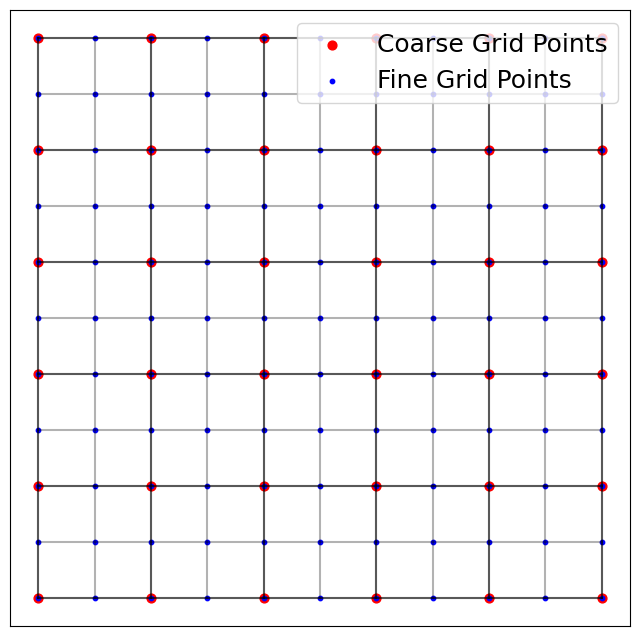

In [22]:
# Define coarse and fine grids
x_coarse = np.linspace(0, 1, 6)  # Coarse grid
x_fine = np.linspace(0, 1, 11)  # Fine grid
y_coarse = np.linspace(0, 1, 6)
y_fine = np.linspace(0, 1, 11)

# Mesh grids
X_coarse, Y_coarse = np.meshgrid(x_coarse, y_coarse)
X_fine, Y_fine = np.meshgrid(x_fine, y_fine)

# Create the plot
plt.figure(figsize=(8, 8))

# Coarse grid visualization
plt.plot(X_coarse, Y_coarse, 'k-', alpha=0.5)  # Horizontal lines
plt.plot(X_coarse.T, Y_coarse.T, 'k-', alpha=0.5)  # Vertical lines
plt.scatter(X_coarse, Y_coarse, color='red', s=40, label="Coarse Grid Points")  # Coarse grid points

# Fine grid visualization
plt.plot(X_fine, Y_fine, 'k-', alpha=0.3)  # Horizontal lines
plt.plot(X_fine.T, Y_fine.T, 'k-', alpha=0.3)  # Vertical lines
plt.scatter(X_fine, Y_fine, color='blue', s=10, label="Fine Grid Points")  # Fine grid points

# Labels and legend
#ax.set_title("Multigrid Example", fontsize=2)
plt.legend(fontsize=18, loc='upper right')

# Adjust aspect ratio
#ax.set_aspect('equal', adjustable='box')

plt.gca().set_xticks([])  # Remove x-axis values
plt.gca().set_yticks([])  # Remove y-axis values

#plt.savefig("Multigrid.png", format="png")